<h2><b>한국어 Word2Vec 실습</b></h2>

<h5><b>KoNLPy 라이브러리 설치</b></h5>

In [2]:
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1-py3
!pip3 install konlpy

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [2,208 kB]
Fetched 2,372 kB in 2s (

<h5><b>데이터셋 불러오기</b></h5>

In [3]:
# 네이버 리뷰 문장 데이터셋을 불러옵니다.
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt -O ratings.txt

--2020-11-25 07:20:14--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19515078 (19M) [text/plain]
Saving to: ‘ratings.txt’

ratings.txt         100%[===================>]  18.61M  43.7MB/s    in 0.4s    

2020-11-25 07:20:14 (43.7 MB/s) - ‘ratings.txt’ saved [19515078/19515078]



In [4]:
# 필요한 라이브러리를 불러옵니다.
import pandas as pd

# 학습용 데이터를 초기화합니다.
train_data = pd.read_table('ratings.txt')

In [5]:
train_data

id                                           document  label
0        8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
1        8132799  디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...      1
2        4655635               폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.      1
3        9251303  와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...      1
4       10067386                        안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.      1
...          ...                                                ...    ...
199995   8963373                                     포켓 몬스터 짜가 ㅡㅡ;;      0
199996   3302770                                              쓰.레.기      0
199997   5458175                  완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.      0
199998   6908648                왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ      0
199999   8548411                                    포풍저그가나가신다영차영차영차      0

[200000 rows x 3 columns]

<h6><b>데이터 전처리</b></h6>

* 기본적인 데이터 정제 작업을 진행합니다.

In [6]:
# 널(Null) 값이 존재하는 행을 제거합니다.
train_data = train_data.dropna(how='any') 
# 리뷰 데이터의 개수를 출력합니다.
print(len(train_data))

199992


In [7]:
# 정규 표현식(Regular Expression)을 이용해 한글 데이터만 남기기
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<h6><b>한글 형태소 분석 및 토큰화 수행</b></h6>

In [8]:
# 한글 형태소 분석기를 이용해 토큰화 작업을 수행합니다. (15분가량 소요)
from konlpy.tag import Okt

tokenized_dataset = [] # 토큰화 완료된 학습 데이터
stopwords = ['은', '는', '이', '가', '을', '를'] # 불용어 정의
okt = Okt() # 한글 형태소 분석기 라이브러리 객체 선언

for w in train_data['document']:
    tokenized = okt.morphs(w, stem=True)
    tokenized = [word for word in tokenized if not word in stopwords]
    tokenized_dataset.append(tokenized)

In [9]:
# 토큰화 완료된 데이터의 개수 확인
print(len(tokenized))

7


In [10]:
# 토큰화가 완료된 리뷰 데이터 확인
print(tokenized_dataset[0])
print(tokenized_dataset[1])
print(tokenized_dataset[2])

['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ']
['디자인', '배우다', '학생', '으로', '외국', '디자이너', '와', '그', '들', '일군', '전통', '통해', '발전', '하다', '문화', '산업', '부럽다', '사실', '우리나라', '에서도', '그', '어렵다', '시절', '에', '끝', '까지', '열정', '지키다', '노라노', '같다', '전통', '있다', '저', '와', '같다', '사람', '들', '꿈', '꾸다', '이루다', '나가다', '수', '있다', '것', '에', '감사하다']
['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '도', '없다', '최고']


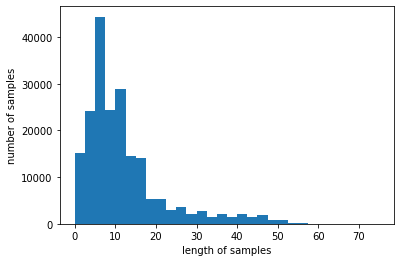

In [11]:
import matplotlib.pyplot as plt

# 리뷰에 포함된 토큰의 개수 분포
plt.hist([len(s) for s in tokenized_dataset], bins=30)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

<h6><b>Word2Vec 학습 진행 및 결과 확인</b></h6>

* <b>gensim</b>: Numpy, SciPy 등으로 구현된 오픈소스 자연어 처리 라이브러리로, Word2Vec 클래스를 지원합니다.
  * size: 임베딩 벡터의 차원
  * window: 윈도우 크기
  * min_count: 단어 최소 빈도수
  * workers: 학습을 위해 사용하는 프로세스 수
  * sg: 0 = CBOW, 1 = Skip-gram

In [12]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=tokenized_dataset, size=100, window=5, workers=4, sg=1)

In [13]:
# 학습된 모델을 확인합니다.
print(model)

Word2Vec(vocab=16489, size=100, alpha=0.025)


In [14]:
print(model.wv.most_similar("공부"))

[('연습', 0.6948530673980713), ('말좀', 0.6793253421783447), ('섭외', 0.6758575439453125), ('분발', 0.6709208488464355), ('자제', 0.6528387069702148), ('기부', 0.6509115695953369), ('반성', 0.6475428342819214), ('보강', 0.640225887298584), ('수정', 0.6386924982070923), ('자시다', 0.6363006234169006)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [15]:
print(model.wv.most_similar("재미"))

[('긴장도', 0.705292820930481), ('감흥', 0.6817975044250488), ('뭣', 0.6728790998458862), ('잼', 0.6710898876190186), ('쥐뿔', 0.6488694548606873), ('스릴', 0.6440681219100952), ('흥미', 0.6412235498428345), ('볼일', 0.636019229888916), ('없슴', 0.6359087824821472), ('재미없다', 0.6356900930404663)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [16]:
print(model.wv.most_similar("프로그램"))

[('프로', 0.8157880306243896), ('예능', 0.7007278203964233), ('방송', 0.6395124197006226), ('교체', 0.6388933062553406), ('공중파', 0.6333023309707642), ('폐지', 0.6324942111968994), ('오디션', 0.6305128335952759), ('우결', 0.6272046566009521), ('여군', 0.6238592863082886), ('종편', 0.6201320290565491)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
